In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2

In [3]:
path_kirmizi = '/Users/jjong/Desktop/vscode/kaggle_src/Pistachio/Pistachio_Image_Dataset/Kirmizi_Pistachio/'
path_siirt = '/Users/jjong/Desktop/vscode/kaggle_src/Pistachio/Pistachio_Image_Dataset/Siirt_Pistachio/'
X_kirmizi = []
X_siirt = []
category = []
height = 100
width = 100

for _, kirmizi in enumerate(os.listdir(path_kirmizi)):
    img = mpimg.imread(path_kirmizi+kirmizi)
    X_kirmizi.append(cv2.resize(img, (height, width)))
    category.append('kirmizi')

for _, siirt in enumerate(os.listdir(path_siirt)):
    img = mpimg.imread(path_siirt+siirt)
    X_siirt.append(cv2.resize(img, (height, width)))
    category.append('siirt')

X_kirmizi = np.array(X_kirmizi)
y_kirmizi = np.zeros(X_kirmizi.shape[0])
X_siirt = np.array(X_siirt)
y_siirt = np.ones(X_siirt.shape[0])
category = np.array(category)

X = np.concatenate((X_kirmizi, X_siirt), axis=0)
y = np.concatenate((y_kirmizi, y_siirt), axis=0)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=category, random_state=0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1718, 100, 100, 3), (430, 100, 100, 3), (1718,), (430,))

In [75]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

inputs = layers.Input(shape=(100, 100, 3))

# Body
x = layers.Conv2D(32, (5, 5), padding='same', strides=1)(inputs)
x = layers.MaxPooling2D((2,2), strides=2)(x)
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x = layers.MaxPooling2D((2,2), strides=2)(x)
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, (3, 3), padding='same', strides=1)(x)
x = layers.MaxPooling2D((2,2), strides=2)(x)
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)

# Neck
x = layers.GlobalMaxPooling2D()(x)

# Header
x = layers.Dense(64)(x) # 바로 activation하지말고 아래와 같이 하는 것이 성능 더 좋음
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32)(x) # 바로 activation하지말고 아래와 같이 하는 것이 성능 더 좋음
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(16)(x) # 바로 activation하지말고 아래와 같이 하는 것이 성능 더 좋음
x = layers.BatchNormalization()(x)  # 배치정규화
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 50, 50, 32)        128       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 50, 50, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        1849

In [76]:
es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=300, callbacks=[es_callback])

Epoch 1/300
22/22 [==============================] - 9s 320ms/step - loss: 0.8363 - acc: 0.5073 - val_loss: 1.2027 - val_acc: 0.5872
Epoch 2/300
22/22 [==============================] - 7s 312ms/step - loss: 0.6861 - acc: 0.6106 - val_loss: 0.7051 - val_acc: 0.5872
Epoch 3/300
22/22 [==============================] - 7s 311ms/step - loss: 0.5987 - acc: 0.6645 - val_loss: 1.2778 - val_acc: 0.5872
Epoch 4/300
22/22 [==============================] - 7s 310ms/step - loss: 0.5142 - acc: 0.7576 - val_loss: 1.5000 - val_acc: 0.5872
Epoch 5/300
22/22 [==============================] - 7s 311ms/step - loss: 0.4316 - acc: 0.8137 - val_loss: 0.5465 - val_acc: 0.7122
Epoch 6/300
22/22 [==============================] - 7s 309ms/step - loss: 0.3727 - acc: 0.8661 - val_loss: 1.5588 - val_acc: 0.5872
Epoch 7/300
22/22 [==============================] - 7s 310ms/step - loss: 0.3225 - acc: 0.9047 - val_loss: 1.3067 - val_acc: 0.5872
Epoch 8/300
22/22 [==============================] - 7s 310ms/step - 

In [77]:
p_test = model.predict(X_test)
p_test

14/14 [==============================] - 1s 36ms/step


array([[0.8299442 ],
       [0.8168554 ],
       [0.16150288],
       [0.01026768],
       [0.8971765 ],
       [0.11932573],
       [0.00692925],
       [0.16459432],
       [0.03406963],
       [0.20277508],
       [0.09908556],
       [0.95541495],
       [0.8987224 ],
       [0.99261194],
       [0.0362298 ],
       [0.98469263],
       [0.05652082],
       [0.00816059],
       [0.0165893 ],
       [0.06449502],
       [0.756474  ],
       [0.91157794],
       [0.01447476],
       [0.6953136 ],
       [0.04519464],
       [0.9775293 ],
       [0.7715479 ],
       [0.03297052],
       [0.85111034],
       [0.09261651],
       [0.05407533],
       [0.26164463],
       [0.01494553],
       [0.40573612],
       [0.13983996],
       [0.03042205],
       [0.12804127],
       [0.05394016],
       [0.6620862 ],
       [0.7887509 ],
       [0.8527736 ],
       [0.20067443],
       [0.00458229],
       [0.0143041 ],
       [0.92181283],
       [0.36392933],
       [0.35762802],
       [0.355

14/14 [==============================] - 1s 36ms/step
정확도 : 0.913953488372093
f1 : 0.8997289972899729


<Figure size 640x480 with 0 Axes>

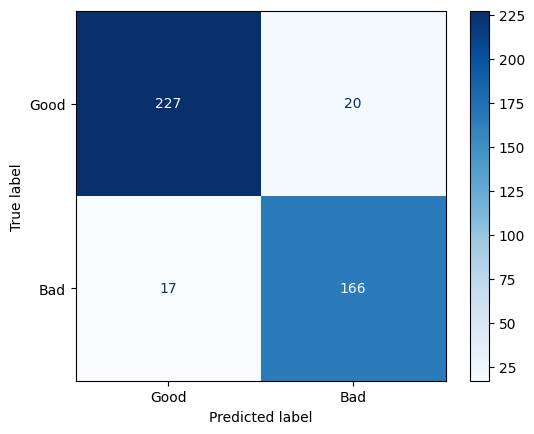

In [78]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

p_test = model.predict(X_test)
p_test_bin = p_test>=0.5

print('정확도 :', accuracy_score(y_test, p_test_bin))
print('f1 :', f1_score(y_test, p_test_bin))

plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, p_test_bin), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()

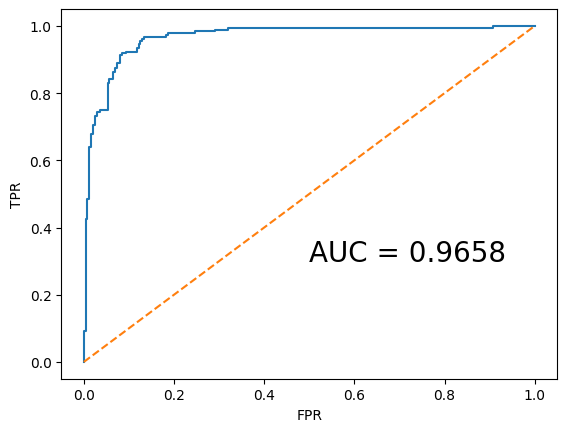

In [79]:
fpr, tpr, _ = roc_curve(y_test, p_test)
auc = roc_auc_score(y_test, p_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [3]:
data = pd.read_excel('/users/jjong/desktop/vscode/kaggle_src/Pistachio/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.xlsx')
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,Siit_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio


In [7]:
data.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

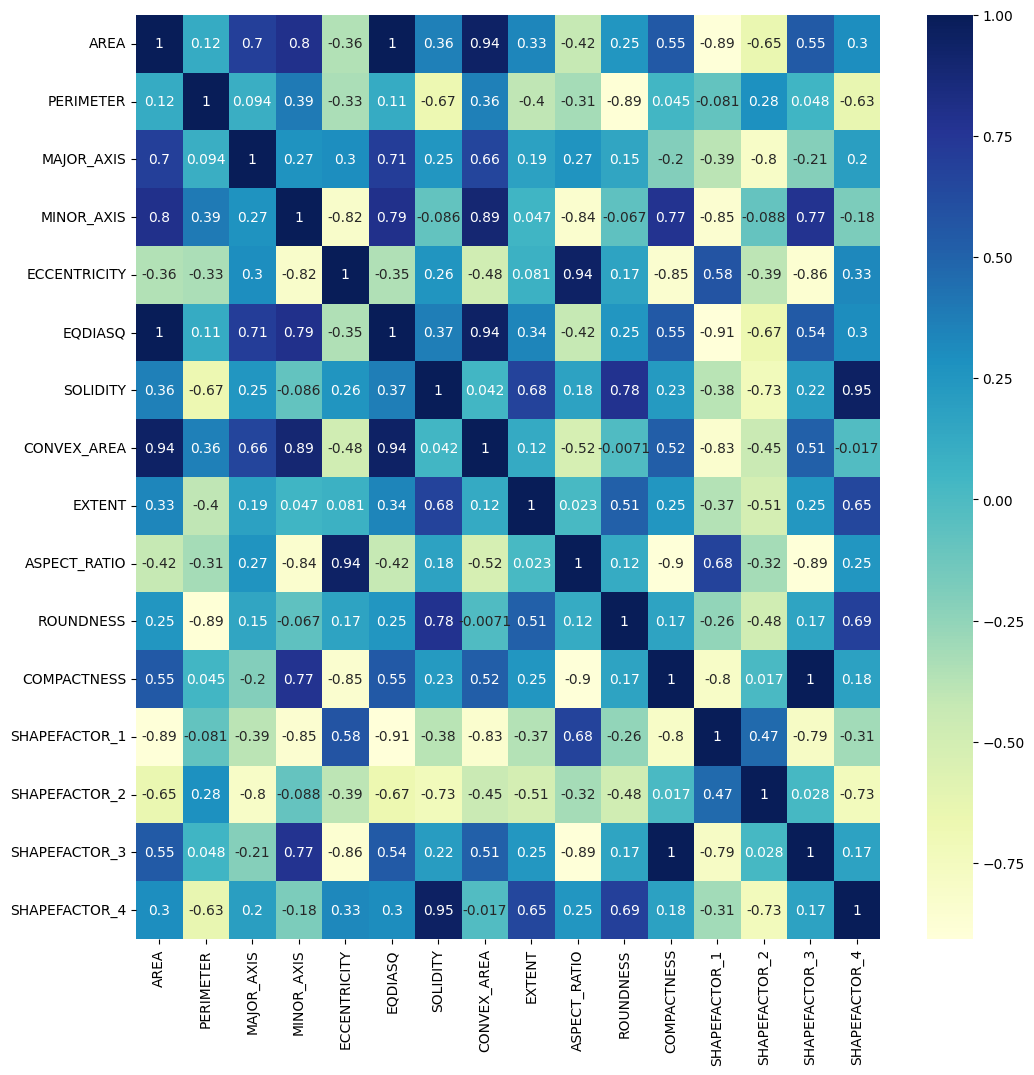

In [8]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

In [9]:
data.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [10]:
data.sample()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
1246,78122,2067.521,427.5836,319.6553,0.6642,315.3855,0.7377,105901,0.5854,1.3376,0.2297,0.7376,0.0055,0.0041,0.5441,0.7277,Siit_Pistachio


<Figure size 640x480 with 0 Axes>

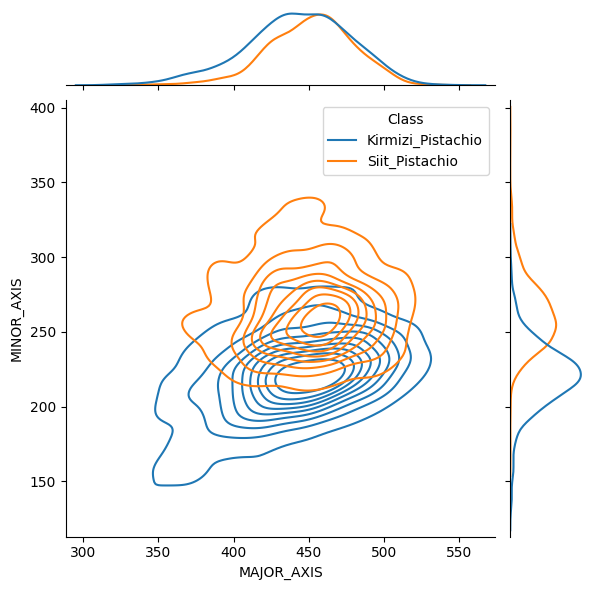

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure()
sns.jointplot(x=data['MAJOR_AXIS'], y=data['MINOR_AXIS'], hue=data['Class'], kind='kde')
plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

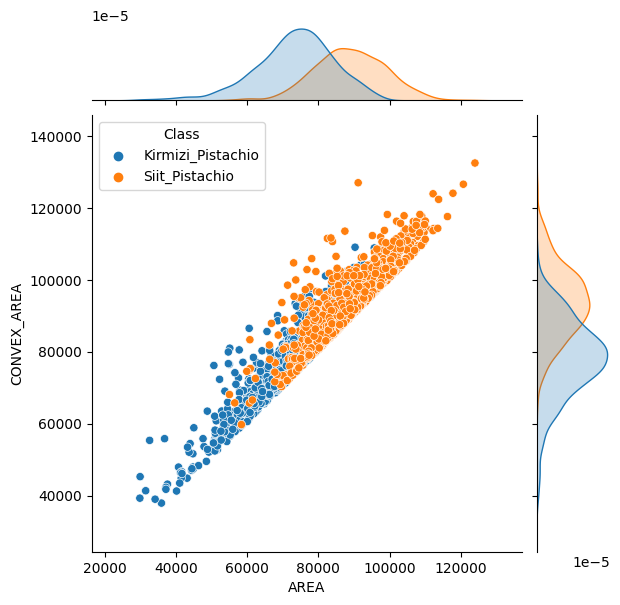

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure()
sns.jointplot(x=data['AREA'], y=data['CONVEX_AREA'], hue=data['Class'])
plt.figure()
plt.show()

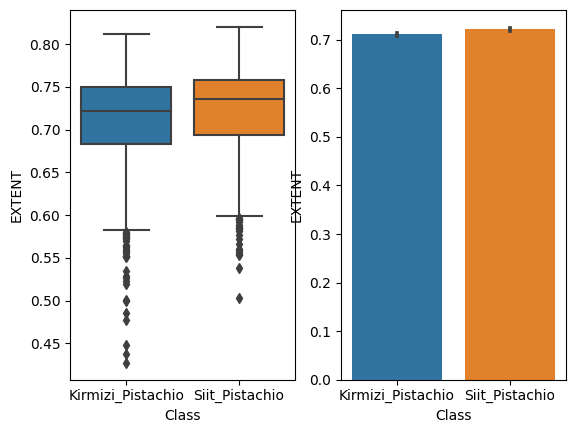

In [13]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(data=data, x='Class', y='EXTENT', ax=ax[0])
sns.barplot(data=data, x='Class', y='EXTENT', ax=ax[1])
plt.show()

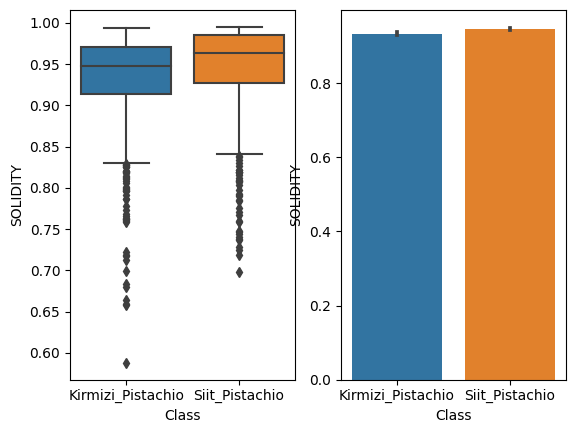

In [16]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(data=data, x='Class', y='SOLIDITY', ax=ax[0])
sns.barplot(data=data, x='Class', y='SOLIDITY', ax=ax[1])
plt.show()

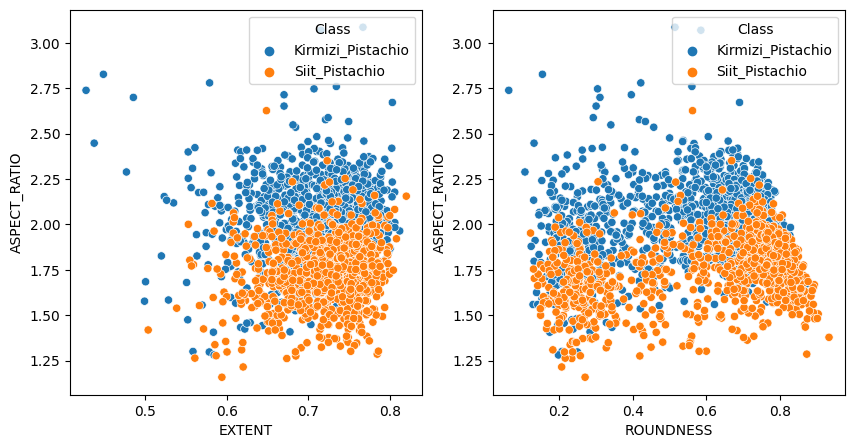

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x='EXTENT', y='ASPECT_RATIO', data=data, hue='Class', ax=ax[0])
sns.scatterplot(x='ROUNDNESS', y='ASPECT_RATIO', data=data, hue='Class', ax=ax[1])
plt.show()

In [14]:
data.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

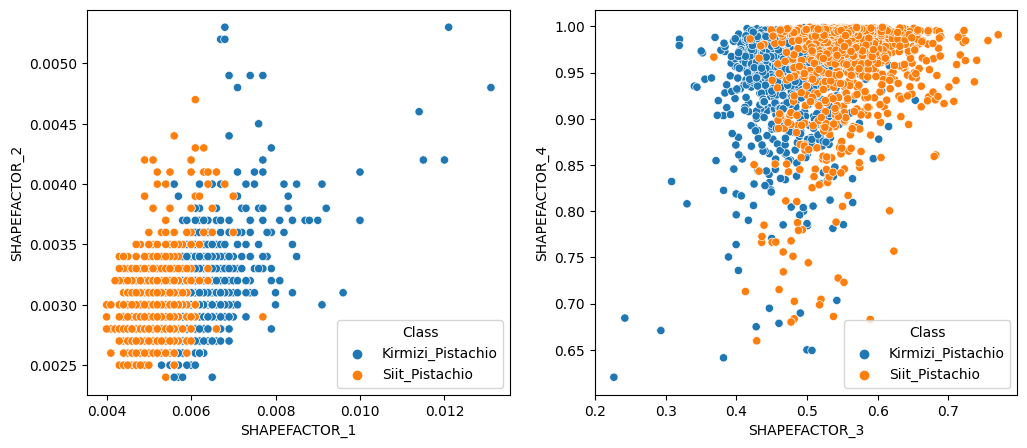

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=data['SHAPEFACTOR_1'], y=data['SHAPEFACTOR_2'], hue=data['Class'], ax=ax[0])
sns.scatterplot(x=data['SHAPEFACTOR_3'], y=data['SHAPEFACTOR_4'], hue=data['Class'], ax=ax[1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_df = data.drop('Class', axis=1)
y_df = data['Class'].map(lambda x: 0 if x == 'Kirmizi_Pistachio' else 1)

X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.2, random_state=24)

scaler = MinMaxScaler()
X_df_train = scaler.fit_transform(X_df_train)
X_df_test = scaler.transform(X_df_test)
X_df_train.shape, y_df_train.shape, X_df_test.shape, y_df_test.shape

((1718, 16), (1718,), (430, 16), (430,))

In [5]:
type(y_df)

pandas.core.series.Series

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_df_train, y_df_train)
p_df_pred = dt.predict(X_df_test)

정확도 : 0.8302325581395349
f1 : 0.7977839335180057


<Figure size 640x480 with 0 Axes>

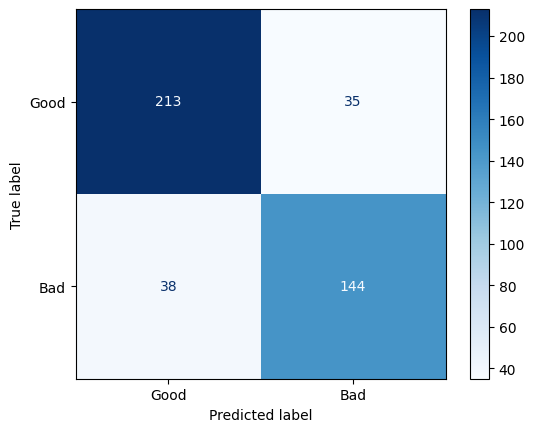

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

print('정확도 :', accuracy_score(y_df_test, p_df_pred))
print('f1 :', f1_score(y_df_test, p_df_pred))

plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_df_test, p_df_pred), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# 그리드 탐색 수행
grid_search.fit(X_df_train, y_df_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_rf = grid_search.best_estimator_
rf_pred = best_rf.score(X_df_test, y_df_test)
print("Test Accuracy:", rf_pred)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.8744186046511628


In [14]:
rf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=24)
rf.fit(X_df_train, y_df_train)
rf_predd = rf.predict(X_df_test)

정확도 : 0.8813953488372093
f1 : 0.8563380281690139


<Figure size 640x480 with 0 Axes>

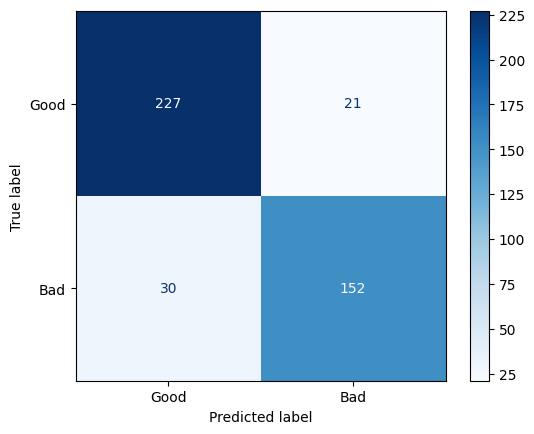

In [15]:
print('정확도 :', accuracy_score(y_df_test, rf_predd))
print('f1 :', f1_score(y_df_test, rf_predd))

plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_df_test, rf_predd), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()

In [21]:
import xgboost as xgb


# XGBClassifier 객체 생성
xgb_clf = xgb.XGBClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.1, 0.2],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# 그리드 탐색 수행
grid_search.fit(X_df_train, y_df_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_xgb = grid_search.best_estimator_
accuracy = best_xgb.score(X_df_test, y_df_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Test Accuracy: 0.8930232558139535


In [24]:
import xgboost as xgb

xg = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=300, random_state=24, colsample_bytree=0.7, subsample=0.7,
                       objective='binary:logistic', n_jobs=-1)
xg.fit(X_df_train, y_df_train)
xg_pred = xg.predict(X_df_test)

정확도 : 0.8930232558139535
f1 : 0.8715083798882681


<Figure size 640x480 with 0 Axes>

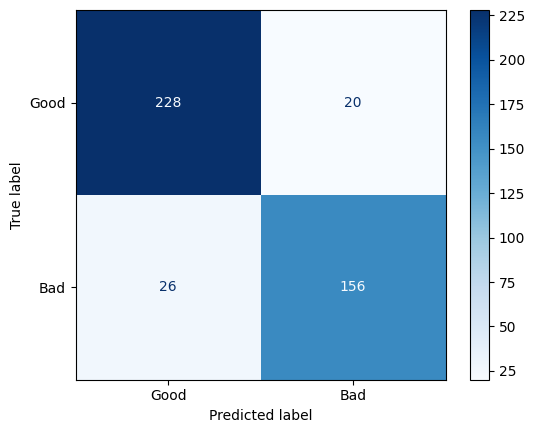

In [25]:
print('정확도 :', accuracy_score(y_df_test, xg_pred))
print('f1 :', f1_score(y_df_test, xg_pred))

plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_df_test, xg_pred), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()